In [1]:
import RNA
import numpy as np

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

import subprocess
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display
from collections import Counter
from collections import defaultdict

import difflib
import sys
import os
import random
import string
import time

# from helper import print_moves

import pandas as pd

sys.path.append('../')
from pretty_print_path import print_moves
import findpath_librna
import findpath


In [2]:
# find a sequence + structure pair as example (good sw-multiplier scaling)

sys.path.append('./indirect')
import helper
target_count = 2000
x = 100
min_bp_dist = 14

def detect_local_minimum(fc, structure):
    # perform gradient walk from sample to determine direct local minimum
    pt = RNA.IntVector(RNA.ptable(structure))
    fc.path(pt, 0, RNA.PATH_DEFAULT | RNA.PATH_NO_TRANSITION_OUTPUT)
    return RNA.db_from_ptable(list(pt))

# check confirmations for merging
s_list = []
while (len(s_list) < target_count):

    # RNAsubopt wrapper
    sequence, s1, s2 = helper.generate_structures(x)

    # overwrite s1 s2 to local minimum
    fc = RNA.fold_compound(sequence)
    s1 = detect_local_minimum(fc, s1)
    s2 = detect_local_minimum(fc, s2)
    bp_dist = RNA.bp_distance(s1, s2)

    if bp_dist < min_bp_dist:
        continue

    # ensure that we only process paths which are not trivial to process - if we get the best result at a 
    # low search width, its probably not a good candidate for training

    sws = [0.5, 1, 2]
    results = []
    for sw in sws:
        fp = findpath.findpath_single(sequence, s1, s2, search_width_multiplier=sw, mp=True)
        result = fp.get_en()/100.0
        results.append(result)
        
    if results[0] != results[1] and results[1] != results[2]:
        
        # print(f"sequence = '{sequence}'")
        # print(f"s1       = '{s1}'")
        # print(f"s2       = '{s2}'")
        # print (results)
        
        s_list.append((sequence, s1, s2))

        if len(s_list)%100 == 0:
            print (len(s_list), end=' ')

            # save seqs every 10 iterations.
            df = pd.DataFrame(s_list, columns=['sequence', 's1', 's2']).set_index('sequence')
            filename = f'./dataset_100B_large.csv'
            df.to_csv(filename)

        

    # break

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 

In [2]:
# df = pd.DataFrame(s_list, columns=['sequence', 's1', 's2']).set_index('sequence')
# filename = f'./dataset_100.csv'
# df.to_csv(filename)

NameError: name 's_list' is not defined

In [3]:
# read in sequence, structure pairs

filename = f'./dataset_100.csv'
input_df = pd.read_csv(filename)
input_df.head()

,sequence,s1,s2
0,UUCCACUAGCUUAACUCGAUCCAAUACUCACUUGGGCUCACUGAUA...,.(((.((.((((..((((((((((.......))))).))..........,..........................(((.(((.(.(((.(((......
1,UCAGUGGGAUAGUUAUACAUCCACACGUGGCACCUAUACCUAUCAU...,...(((((((........)))).)))(.(((.(((((.((.........,...(((.(((((.((((...(((....)))....)))).))))).)...
2,GAUAUUAUGGUACCAUACUUUUGGGGUCUGCGAGUACCCGCCUUAG...,(((((((.((((...))))...(((((((.(((.....(((((.((...,........((((..........(((((((.(((...((((.....(...
3,UUUUAGUUAGCCACGUCGCCGGUCGCGUAUAAGCCGGGUACCCGAG...,..........((.((..((((((.((......))..(((((....)...,((.((((.......((..(((((.........)))))..))........
4,GCUCACUUUUAUUUAGUUACUCGGGUCCGGUCUGGUCCGUUGGCGG...,(((.(((((((..........((((.((.....))))))...((((...,.............(((..((((.(((..(((....((((..(((((...


# feature engineering

In [4]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) # no scientific notation

In [25]:
# import feature_generation

from features import ij_distance, new_move_dist, plt_moves, config_distance, balance_in_all_things, return_shift_moves




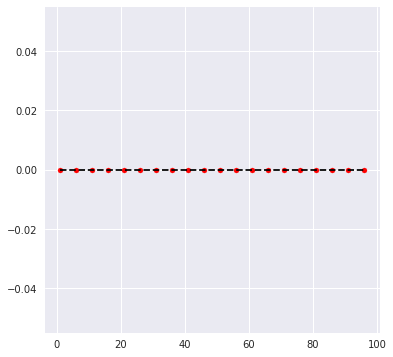

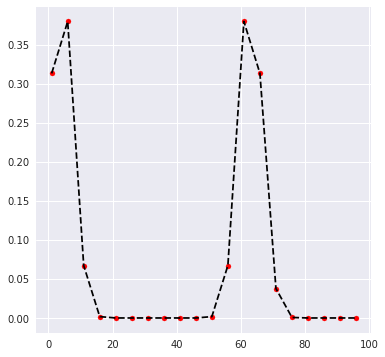

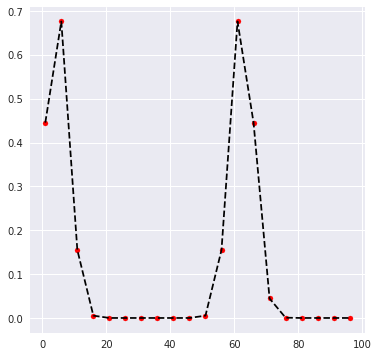

In [6]:
# probability distribution functions
# this is limited to 100 nt seqs atm




ij_moves = [(0,0), (3, 62), (4, 61), (6, 60), (7, 59), (9, 57), (10, 56), (11, 55), (12, 54), (15, 52), (16, 51), (17, 50), (18, 39), (19, 38), (20, 36), (21, 35), (22, 34), (23, 33), (24, 32), (42, 49), (43, 48), (64, 99)]

move_dist = np.zeros((20))

for e, (i, j) in enumerate(ij_moves):
    move_dist = new_move_dist(i, j, move_dist)    
    plt_moves(move_dist)

    if e > 1:
        break
    



In [7]:

s1 = '..((((((....((((((....((.......(((....((.((((.(..((...))..))))).))...))).....))..))))))..)))).))....'
s  = '.((.((((....((((((....((...(((((..........(((.(..((...))..)))).))))).........))..))))))..)))))).....' # some random intermediate
s2 = '.((.((((....((((((....((...(((((((.((((.((((.....))))..))))..))))))).........))..))))))..)))))).....'
balance_in_all_things(s1, s2, s)

# print (len(s1))

# len([len(i) for i in s1 if i=='.'])

2

In [10]:



# sample call
ij_moves = [(3, 62), (4, 61), (6, 60), (7, 59), (9, 57), (10, 56), (11, 55), (12, 54), (15, 52), (16, 51), (17, 50), (18, 39), (19, 38), (20, 36), (21, 35), (22, 34), (23, 33), (24, 32), (42, 49), (43, 48), (64, 99)]
last_move = (2, 63)
this_move = (6, 60)

# how far is the last move away from the current move.
# it is likely, that the next move is close to the last one
# there are better distance metrices probably...

print (ij_distance(last_move, this_move, ij_moves)) # (0.13636363636363635, 0.2857142857142857, 0.14285714285714285)

"""
are we extending / removing the outside/inside layer of a loop or adding something in the middle?
"""

thiss = "..((.((.((((..((((((((((.......))))).))..........))).)))).)))).(((.((((((..((((.....))))..)))))))))."
this_move = (6, 60)

pt = list(RNA.ptable(thiss))
cd = config_distance(pt, this_move)
print (cd)


sequence = 'UUGUACUAUAAUGGUGAGGGUUCGGCACUAUGGCGUGUGUUCAGUUAAUAAAGGGUACUGUAAUUCCGCGUGGACGGCGCCUCUCGCAUGCUAUUUAAAG'
s1       = '.............((((((....(((.((.(.(((((.(((((((...........)))).)))..))))).)..)).))))))))).............'
s2       = '.............(((((((((((...((((.(((.(.(((((((...........)))).))).)))))))).))).))).))))).............'

_, path = fp_call(sequence, s1, s2)




(0.13636363636363635, 0.2857142857142857, 0.14285714285714285)
1


([], [])

In [11]:
X_test = np.array([[-3.2, -1.,  4.]])
X_test_minmax = min_max_scaler.fit_transform(X_test.T).T[0]
X_test_minmax
random.random()

0.42374528100878694

In [32]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) # no scientific notation

from process_features import fp_call, find_moves, process


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# test run, verbose
search_width_multiplier = 2
results = []

for index, row in input_df.iterrows():
    if index!=21:
       continue
    sequence = row.sequence
    s1 = row.s1
    s2 = row.s2
    process(sequence, s1, s2, search_width_multiplier)

   #  _, p = fp_call(sequence, s1, s2)
   #  print_moves(sequence, s1, s2, p)
    # break


In [15]:
search_width_multiplier = 10

results = []
vec_results = []

for index, row in input_df.iterrows():
    
    # if index!=1:
    #     continue

    # if index<90:
    #     continue
    if index>10:
        break
    
    percent_complete = 100-(len(input_df)-index)/len(input_df)*100
    bar_length = 20
    filled_length = int(percent_complete/100*bar_length)
    rest = bar_length - filled_length
    bar = "█" * filled_length + '_' * rest
    print(
        f'\rComputing |{bar}| {percent_complete:.1f}% complete {index} ')

    sequence = row.sequence
    s1 = row.s1
    s2 = row.s2


    a, b = process(sequence, s1, s2)
    results += a
    vec_results += b

    # break

# print (results)


Computing |____________________| 0.0% complete 0 
Computing |____________________| 1.0% complete 1 
Computing |____________________| 2.0% complete 2 
Computing |____________________| 3.0% complete 3 
Computing |____________________| 4.0% complete 4 
Computing |█___________________| 5.0% complete 5 
Computing |█___________________| 6.0% complete 6 
Computing |█___________________| 7.0% complete 7 
Computing |█___________________| 8.0% complete 8 
Computing |█___________________| 9.0% complete 9 
Computing |██__________________| 10.0% complete 10 


In [16]:
output_df = pd.DataFrame(results)

# snew, i, j, pos_result, ijd, thisclose, lastclose, cd, en_list_scaled[pos], found
output_df.columns = ['s', 'i', 'j', 'target', 'ijd', 'thisclose', 'lastclose', 'cd', 'en_pos',\
                     'i_shift', 'j_shift', 'insert_or_delete', 'balance']

print (output_df)

output_df.to_csv("dataset_105_train.csv")
# output_df.to_csv("dataset_105_test.csv")
# output_df

output_df = pd.DataFrame(vec_results)
output_df.to_csv("dataset_105_vec_train.csv")
# output_df.to_csv("dataset_105_vec_test.csv")
# output_df


                                                      s   i    j  target  \
0     ..((.((.(((...((((((((((.......))))).)).......... -12  -54       1   
1     ..((.(..((((..((((((((((.......))))).))..........  -7  -59       1   
2     ..((.((.((((..(((((((((.........)))).)).......... -24  -32       0   
3     ..((.((.((((..((((((((((.......))))).)).......... -64  -99       0   
4     ..((.((.((((..(((((.((((.......))))..)).......... -20  -36       1   
...                                                 ...  ..  ...     ...   
4926  .((......))(....((((((.(((((((((..((((..(((......  12  100       1   
4927  .((......))...((((((((.(((((((((..((((..(((......  16   96       1   
4928  .((......))..((.((((((.(((((((((..((((..(((......  14   98       1   
4929  .((......)).(.(.((((((.(((((((((..((((..(((......  13   99       1   
4930  .((......))(..(.((((((.(((((((((..((((..(((......  12  100       1   

           ijd  thisclose  lastclose  cd    en_pos  i_shift  j_shift  \
0     0.363636 

In [5]:
search_width_multiplier = 4

# call with search width multiplier:
fp = findpath.findpath_single(sequence, s1, s2, search_width_multiplier=search_width_multiplier, mp=True)

# call with fixed search width integer:
# fp = findpath.findpath_single(sequence, s1, s2, search_width=50, mp=mp)

# call with added model detail dictionary:
# fp = findpath.findpath_single(sequence, s1, s2, search_width_multiplier=search_width_multiplier, 
#     mp=mp, model_details={"temperature": -14.5,})

result = fp.get_en()/100.0
path = fp.get_path()



In [6]:
print_moves(sequence, s1, s2, path, convert_to_float=True)
# print (path, result)

UUGUACUAUAAUGGUGAGGGUUCGGCACUAUGGCGUGUGUUCAGUUAAUAAAGGGUACUGUAAUUCCGCGUGGACGGCGCCUCUCGCAUGCUAUUUAAAG
.............((((((....(((.((.(.(((((.(((((((...........)))).)))..))))).)..)).)))))))))............. [   0,    0 ] -21.60
.............((((((....(((.(..(.(((((.(((((((...........)))).)))..))))).)...).)))))))))............. [ -29,  -76 ] -19.90
.............((((((....(((....(.(((((.(((((((...........)))).)))..))))).).....)))))))))............. [ -28,  -77 ] -19.10
.............((((((....((.....(.(((((.(((((((...........)))).)))..))))).)......))))))))............. [ -26,  -79 ] -15.50
.............((((((....(......(.(((((.(((((((...........)))).)))..))))).).......)))))))............. [ -25,  -80 ] -12.00
.............((((((...........(.(((((.(((((((...........)))).)))..))))).)........))))))............. [ -24,  -81 ] -13.80
.............(((((............(.(((((.(((((((...........)))).)))..))))).).........)))))............. [ -19,  -82 ] -12.90
.............((((((...........(.(((((.(((((((

-12.0

In [7]:
def find_moves(s_ptable, t_ptable):
    """
    generator function, yields possible structures 1 move away
    from the original structure by finding fitting i and j with
    RNA pair and loop tables
    s_ptable: current ptable
    t_ptable: s2 end ptable
    """
    # loop table
    ls = RNA.loopidx_from_ptable(s_ptable)
    for i in range(len(s_ptable)):
        if i == 0:
            continue
        if s_ptable[i] == 0 and t_ptable[i] > i:
            j = t_ptable[i]
            # found j has to be empty and currently on the same loop as i
            if s_ptable[j] == 0 and ls[i] == ls[j]:
                yield i, j
        # test for bp removal: i has to be paired with a different j in s2
        j = s_ptable[i]
        # dont remove things which are present in s2
        if s_ptable[i] > i and s_ptable[i] != s_ptable[j] and\
                s_ptable[i] != t_ptable[i] and s_ptable[j] != t_ptable[j]:
            yield -i, -j



s = s1
pt2 = list(RNA.ptable(s2))
fc = RNA.fold_compound(sequence)

for e, (a,b, en) in enumerate(path):
    

    if (a,b) == (0,0):
        continue

    


    # check where we can go, compare with our best move. 
    pt = list(RNA.ptable(s))


    # check available moves, save them, sort them
    
    avail_moves = []

    found_pos = None

    for pos, (i,j) in enumerate(find_moves(pt, pt2)):    
        next_en = fc.eval_move_pt(pt, i, j)
        # mark where we found our move
        found = (i,j) == (a,b)
        avail_moves.append((i, j, next_en, found))


    avail_moves.sort(key=lambda x: x[2])
    found_list = [x[3] for x in avail_moves]

    # find where our move is after sorting
    found_pos = found_list.index(True)
    rel_pos = found_pos * 1.0 / len(found_list)

    print (e, a,b, 'found at pos:', found_pos, 'of', len(avail_moves), ':',  1-rel_pos)
    # print (avail_moves, a, b)

    
    # if e==63:
    #     print (avail_moves)

    # update s for the next iteration
    
    if a > 0:
        s = s[:a-1] + "(" + s[a:b-1] + ")" + s[b:]
    if a < 0:
        s = s[:-a-1] + "." + s[-a:-b-1] + "." + s[-b:]
    # if not en:
    #     en = round(fc.eval_structure(s), 2)



    # print (s)

    # if e>1:
    #     break

    # break





1 -29 -76 found at pos: 1 of 12 : 0.9166666666666666
2 -28 -77 found at pos: 1 of 11 : 0.9090909090909091
3 -26 -79 found at pos: 3 of 10 : 0.7
4 -25 -80 found at pos: 3 of 9 : 0.6666666666666667
5 -24 -81 found at pos: 0 of 8 : 1.0
6 -19 -82 found at pos: 1 of 12 : 0.9166666666666666
7 19 81 found at pos: 1 of 12 : 0.9166666666666666
8 20 80 found at pos: 0 of 11 : 1.0
9 -31 -73 found at pos: 1 of 10 : 0.9
10 28 73 found at pos: 2 of 11 : 0.8181818181818181
11 29 72 found at pos: 0 of 10 : 1.0
12 -33 -71 found at pos: 3 of 9 : 0.6666666666666667
13 30 71 found at pos: 1 of 9 : 0.8888888888888888
14 24 75 found at pos: 1 of 8 : 0.875
15 23 76 found at pos: 0 of 7 : 1.0
16 -34 -70 found at pos: 3 of 6 : 0.5
17 31 70 found at pos: 0 of 6 : 1.0
18 21 79 found at pos: 0 of 5 : 1.0
19 22 77 found at pos: 0 of 4 : 1.0
20 -35 -69 found at pos: 1 of 3 : 0.6666666666666667
21 33 69 found at pos: 0 of 3 : 1.0
22 -36 -68 found at pos: 0 of 2 : 1.0
23 -37 -67 found at pos: 1 of 2 : 0.5
24 34 68 fo

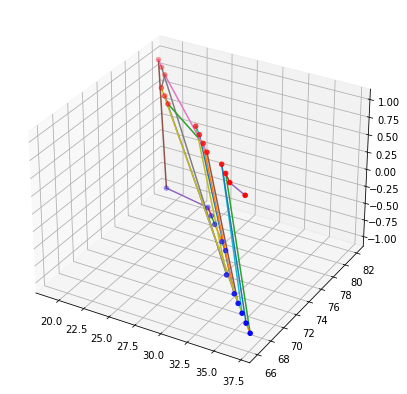

In [8]:
# %matplotlib widget
%matplotlib inline


"""
move visualization
"""

sequence = 'UUGUACUAUAAUGGUGAGGGUUCGGCACUAUGGCGUGUGUUCAGUUAAUAAAGGGUACUGUAAUUCCGCGUGGACGGCGCCUCUCGCAUGCUAUUUAAAG'
s1       = '.............((((((....(((.((.(.(((((.(((((((...........)))).)))..))))).)..)).))))))))).............'
s2       = '.............(((((((((((...((((.(((.(.(((((((...........)))).))).)))))))).))).))).))))).............'

fc = RNA.fold_compound(sequence)
pt1 = RNA.ptable(s1)
pt2 = RNA.ptable(s2)

move_list = []
move_list_vis = []

for i in range(1, len(sequence)+1):
    if (pt1[i] != pt2[i]):
        if (i < pt1[i]):
            # /* need to delete this pair */
            # // move_list.push_back(0);
            move_list.append((-i, -pt1[i]))
            move_list_vis.append((i, pt1[i], -1))
            bp_dist =+ 1

        if (i < pt2[i]):
            # /* need to insert this pair */
            # // move_list.push_back(0);
            move_list.append((i, pt2[i]))
            move_list_vis.append((i, pt2[i], 1))
            bp_dist =+ 1


move_list_vis = np.array(move_list_vis)

move_list_vis = move_list_vis.T
i0 = np.where(move_list_vis[2] == -1)[0] # Fraction 0: Iris-setosa
i1 = np.where(move_list_vis[2] == 1)[0] # Fraction 1: Iris-versicolor
move_list_vis = move_list_vis.T

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(move_list_vis[:,0][i0], move_list_vis[:,1][i0], move_list_vis[:,2][i0], color='blue', label='Iris setosa') # scatter plot fraction 0 Iris-setosa
ax.scatter(move_list_vis[:,0][i1], move_list_vis[:,1][i1], move_list_vis[:,2][i1], color='red', label='Iris versicolor')  # scatter plot Fraction 1: Iris-versicolor


# samples = np.stack([data[0], data[1], data[2], np.ones_like(data[0])], axis=1)
# move_list_vis
# move_list_vis


# connect points as the path tells us
for n in range(len(path)-2):

    i1, j1, _ = path[n+1]
    i2, j2, _ = path[n+2]

    if i1 < 0: # delete move 1
        k1 = -1
        i1, j1 = -i1, -j1
    else:
        k1 = 1

    if i2 < 0: # delete move 2
        k2 = -1
        i2, j2 = -i2, -j2
    else:
        k2 = 1

    # xvalues, yvalues, zvalues
    ax.plot((i1, i2), (j1, j2), (k1, k2))

    # print (i1, j1, k1, i2, j2, k2)
    # break


# ax.arrow(0, 0, 0.6, 0.7, head_width = 0.05, 
#          head_length = 0.1)